# The Museum of Modern Art: A closer look at how collections have progressed in the past 150 years
Maleeha Zaman 7/30/2023

Project for Digital Humanities 140: Coding For Humanities (UCLA Summer 2023)

## Introduction

![MoMA Pic](images/moma.jpg)

> The Museum of Modern Art (MoMA) was established in New York City and hosts a collection of modern (produced during 1860s-1970s) and contemporary (produced by artists today) art works. Acquiring its first works in 1929, MoMA now has an evolving collection containing over 200,000 works from around the world. The collections includes an expansive range of visual expression such as painting, sculpture, printmaking, film, and many more that will be investigated in this project.  

### About the Dataset

[Museum of Modern Art Collection](https://github.com/MuseumofModernArt/collection)

This MoMA collections data was developed by the Museum itself and sourced directly form the MoMA database. It consists of an artists dataset and acquired artworks dataset.

The [artworks dataset](https://github.com/MuseumofModernArt/collection/blob/master/Artworks.csv) contains basic metadata for each work, including title, artist, date made, medium, dimensions, and date acquired by the Museum. Some of the records have incomplete information and have been noted as "not Curator Approved".

The [artists dataset](https://github.com/MuseumofModernArt/collection/blob/master/Artists.csv) contains 15,243 records of artists who have works in MoMA's collection. It includes basic metadata for each artist, including name, nationality, gender, birth year, death year, Wiki QID, and Getty ULAN ID.

### Why Examine the History of MoMA Collections?
The MoMA collections dataset holds immense potential to uncover trends and influences on the artistic evolution during the past 150 years. Examining the metadata of the artists and art works included in the collection, we can more accurately trace the cultural, social, and historical shifts that occurred in MoMA, as well as any disparities in representation. This dataset can offer key insights into the tastes of MoMA curators by examining factors that could have contributed to their inclusion in the MoMA collections as well as identify underrepresented groups.  

### Research Questions
1. How do aspects of the artworks in the collection reflect shifts in representation of gender and nationality throughout the 20th and 21st centuries based on the years they were produced? What about shifts in sentiments (positive/negative)?
2. What aspects (mediums, age, nationality, gender, positive/negative themes) of the artists and their works influence the museum's curatorial decisions? Based on the date of acquisition, how do these preferences change over time?

## Methods

## Results

### Exploratory Data Analysis

In [1]:
!pip install plotly_express
import pandas as pd
import plotly_express as px
import matplotlib.pyplot as plt
import numpy as np
import math
import string

import requests
import nltk

from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.stem.porter import PorterStemmer 
import folium
import geopandas as gpd
import contextily as ctx

In [2]:
dfartworks = pd.read_csv('https://github.com/MuseumofModernArt/collection/raw/master/Artworks.csv')
dfartists = pd.read_csv('https://github.com/MuseumofModernArt/collection/raw/master/Artists.csv')

In [3]:
dfartworks.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjUyNzc3MCJd...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjUyNzM3NCJd...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,http://www.moma.org/media/W1siZiIsIjUyNzM3NSJd...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,http://www.moma.org/media/W1siZiIsIjUyNzQ3NCJd...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,http://www.moma.org/media/W1siZiIsIjUyNzQ3NSJd...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN


In [4]:
dfartworks['Department'].unique()

array(['Architecture & Design', 'Drawings & Prints',
       'Painting & Sculpture', 'Photography', 'Media and Performance',
       'Film', 'Architecture & Design - Image Archive',
       'Fluxus Collection'], dtype=object)

In [5]:
dfartworks['YearAcquired'] = pd.DatetimeIndex(dfartworks['DateAcquired']).year

In [6]:
dfartworks[dfartworks['Gender'] != '(Male)']

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.),YearAcquired
65,"House IV Project, Falls Village, Connecticut (...","Peter Eisenman, Robert Cole","6969, 8134","(American, born 1932)",(American) (),(1932) (0),(0) (0),(Male) (Male),1975,Ink and color ink on frosted polymer sheet,...,NaN,NaN,NaN,34.9251,NaN,NaN,113.3477,NaN,NaN,1980.0
66,"Villa dall'Ava, Paris (Saint-Cloud), France, E...","Rem Koolhaas, Madelon Vriesendorp","6956, 6957","(Dutch, born 1944) (Dutch, born 1945)",(Dutch) (Dutch),(1944) (1945),(0) (0),(Male) (Female),1987,Synthetic polymer paint and ink on paper,...,NaN,NaN,NaN,63.5001,NaN,NaN,99.0602,NaN,NaN,2000.0
76,"Regional Administrative Center, project ""Tries...","Aldo Rossi, Gianni Braghieri, M. Bosshard","7661, 8131, 8180","(Italian, 1931–1997) (Italian, born 1945) (Ita...",(Italian) (Italian) (Italian),(1931) (1945) (0),(1997) (0) (0),(Male) (Male) (Male),1974,Rubbed ink and pastel on whiteprint,...,NaN,NaN,NaN,72.4000,NaN,NaN,91.4000,NaN,NaN,1980.0
107,"Woodland Crematorium, Woodland Cemetery, Stock...","Erik Gunnar Asplund, Sigurd Lewerentz","27, 24452","(Swedish, 1885–1940) (Swedish)",(Swedish) (Swedish),(1885) (0),(1940) (0),(Male) (Male),1937,Graphite on tracing paper,...,NaN,NaN,NaN,41.3000,NaN,NaN,96.2000,NaN,NaN,1990.0
110,"Palais de la Découverte Project, Paris, France...","Paul Nelson, Frantz Jourdain, Oscar Nitzchke","8102, 6703, 4312","(American, 1895–1979) (French, 1847–1935) (Ame...",(American) (French) (American),(1895) (1847) (1900),(1979) (1935) (1991),(Male) (Male) (Male),1938,Ink and color pencil on paper mounted on board,...,NaN,1.3,NaN,37.5000,NaN,NaN,95.3000,NaN,NaN,1966.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139915,Invitation to 528 W. B'way Wash. Sq. Gallery o...,Takako Saito,5117,"(Japanese, born 1929)",(American),(1929),(0),(Female),1964,Stamped ink on wood,...,NaN,0.5,NaN,11.5000,NaN,NaN,7.5000,NaN,NaN,2008.0
139916,Invitation to 528 W. B'way Wash. Sq. Gallery o...,Takako Saito,5117,"(Japanese, born 1929)",(American),(1929),(0),(Female),1964,Stamped ink on wood,...,NaN,0.5,NaN,11.5000,NaN,NaN,7.5000,NaN,NaN,2008.0
139917,One invitation to exhibition opening,Takako Saito,5117,"(Japanese, born 1929)",(American),(1929),(0),(Female),1965,Felt-tip pen and stamped ink on wood,...,NaN,0.5,NaN,11.5000,NaN,NaN,7.5000,NaN,NaN,2008.0
139918,One invitation to exhibition opening,Takako Saito,5117,"(Japanese, born 1929)",(American),(1929),(0),(Female),1965,Felt-tip pen and stamped ink on wood,...,NaN,0.5,NaN,11.5000,NaN,NaN,7.5000,NaN,NaN,2008.0


In [7]:
dfartists.head(10)

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN
5,6,Danilo Aroldi,"Italian, born 1925",Italian,Male,1925,0,NaN,NaN
6,7,Bill Aron,"American, born 1941",American,Male,1941,0,NaN,NaN
7,9,David Aronson,"American, born Lithuania 1923",American,Male,1923,0,Q5230870,500003363.0
8,10,Irene Aronson,"American, born Germany 1918",American,Female,1918,0,Q19748568,500042413.0
9,11,Jean (Hans) Arp,"French, born Germany (Alsace). 1886–1966",French,Male,1886,1966,Q153739,500031000.0


In [8]:
dfartists['Nationality'].unique()

array(['American', 'Spanish', 'Danish', 'Italian', 'French', 'Estonian',
       'Mexican', 'Swedish', nan, 'Israeli', 'British', 'Finnish',
       'Polish', 'Palestinian', 'Japanese', 'Guatemalan', 'Colombian',
       'Romanian', 'Russian', 'German', 'Argentine', 'Kuwaiti', 'Belgian',
       'Dutch', 'Norwegian', 'Nationality unknown', 'Chilean', 'Swiss',
       'Costa Rican', 'Czech', 'Brazilian', 'Austrian', 'Canadian',
       'Australian', 'Ukrainian', 'Hungarian', 'Haitian', 'Congolese',
       'Bolivian', 'Cuban', 'Slovenian', 'Portuguese', 'Indian',
       'Peruvian', 'Icelandic', 'Irish', 'Croatian', 'Uruguayan',
       'Slovak', 'Greek', 'Chinese', 'Venezuelan', 'Native American',
       'Turkish', 'Panamanian', 'Algerian', 'Ecuadorian', 'South African',
       'Iranian', 'Korean', 'Serbian', 'Canadian Inuit', 'Paraguayan',
       'Luxembourger', 'Nicaraguan', 'Zimbabwean', 'Moroccan',
       'Tanzanian', 'Bulgarian', 'Tunisian', 'Sudanese', 'Taiwanese',
       'Ethiopian', 'Yu

In [9]:
dfartists['Gender'].unique()

array(['Male', 'Female', nan, 'Non-Binary', 'male', 'female',
       'Non-binary'], dtype=object)

In [10]:
dfartists['Gender'] = dfartists['Gender'].str.lower()

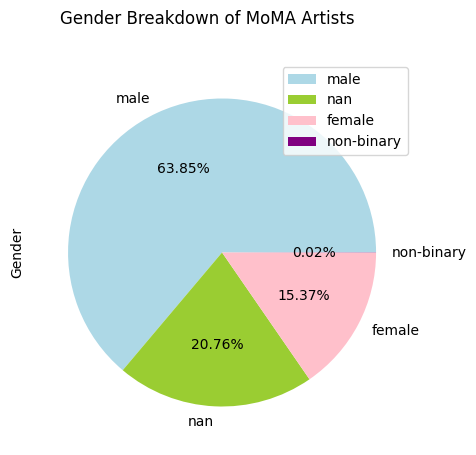

In [11]:
gender = dfartists['Gender']
dfgender = gender.value_counts(dropna = False).to_frame()
genderplot = dfgender.plot.pie(subplots = True, figsize=(12,5), autopct='%1.2f%%', colors = ['lightblue', 'yellowgreen', 'pink', 'purple'], title = 'Gender Breakdown of MoMA Artists')

/tmp/ipykernel_541/3233069019.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfartworks['Medium'] = dfartworks['Medium'].str.replace(c, ' ')


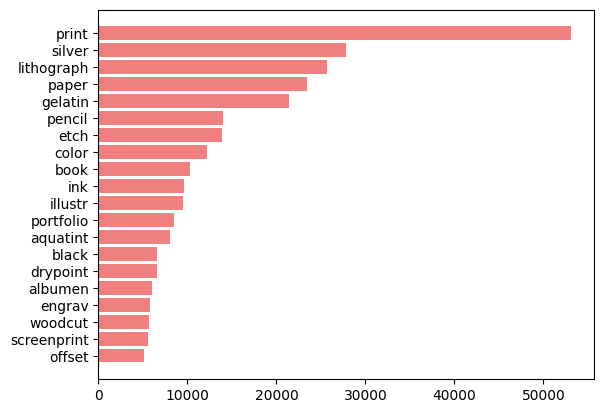

In [12]:
myStopWords = list(punctuation) + stopwords.words('english')
numWords = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
dfartworks['Medium'] = dfartworks['Medium'].str.lower()
for c in punctuation:
  dfartworks['Medium'] = dfartworks['Medium'].str.replace(c, ' ')
dfartworks = dfartworks.astype({'Medium':'string'})
dfmed = dfartworks['Medium'].dropna()
medwordlist = []
for i in dfmed:
    for w in i.split():
        if w not in myStopWords and w not in numWords and (not w.isnumeric()):
            medwordlist.append(PorterStemmer().stem(w))

dfmed = pd.DataFrame(nltk.FreqDist(medwordlist).most_common(20), columns= ['Words', 'Frequency']).sort_values('Frequency')
medplot = plt.barh(dfmed['Words'], dfmed['Frequency'], color='lightcoral')

In [13]:
len(medwordlist)

489275

<Axes: >

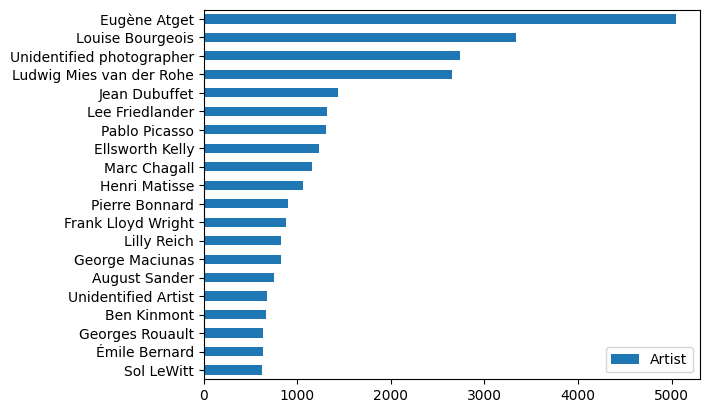

In [14]:
artistdist = dfartworks['Artist']
artistdistdf = artistdist.value_counts().to_frame()
artistdistdf.head(20).sort_values('Artist').plot.barh()

/tmp/ipykernel_541/2118156294.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfartworks['Date'] = dfartworks['Date'].str.replace(c, ' ')


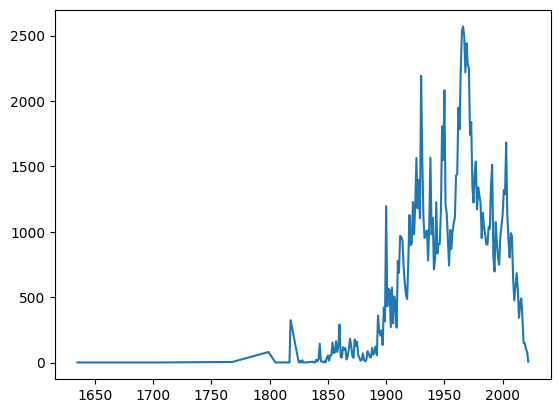

In [15]:
dates = []
dfartworks = dfartworks.astype({'Date':'string'})
for c in punctuation:
  dfartworks['Date'] = dfartworks['Date'].str.replace(c, ' ')
dfartworks['Date'] = dfartworks['Date'].str.replace('s', ' ')
dfartworks['Date'] = dfartworks['Date'].str.replace('–', ' ')
dfartworks['Date'] = dfartworks['Date'].str.lower()

for i in range(len(dfartworks)):
   if (not pd.isna(dfartworks['Date'][i])):
      for w in dfartworks['Date'][i].split():
        if (not pd.isna(w)) and w.isnumeric() and len(w) == 4:
          dfartworks['Date'][i] = w
index = 0
for w in dfartworks['Date']:
   if (not pd.isna(w)) and w.isnumeric() and len(w) == 4:
          dates.append(int(w))
dates.sort()
timeseries = np.unique(dates, return_counts=True)
plt.plot(timeseries[0], timeseries[1])

In [16]:
dfworks = dfartworks.copy()
notyears = []
dfworks['Date'].dropna(inplace = True)
for w in dfworks['Date']:
    if (not pd.isna(w)) and not w.isnumeric() and len(w) != 4 and w not in notyears:
        notyears.append(w)
for i in notyears:
    dfworks = dfworks[dfworks['Date'] != i]
dfworks = dfworks[dfworks['Date'] != "n d "]
dfworks

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.),YearAcquired
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,ink and cut and pasted painted pages on paper,...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN,1996.0
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,paint and colored pencil on print,...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN,1995.0
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,graphite pen color pencil ink and gouache ...,...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN,1997.0
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,photographic reproduction with colored synthet...,...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN,1995.0
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,graphite color pencil ink and gouache on tr...,...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN,1997.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140843,"Page from Sketchbook #24, New York City",Ellsworth Kelly,3048,"(American, 1923–2015)",(American),(1923),(2015),(Male),1954,page from a spiral bound sketchbook with penci...,...,NaN,0.0,NaN,30.8000,NaN,NaN,22.5000,NaN,NaN,2020.0
140844,"Page from Sketchbook #24, New York City",Ellsworth Kelly,3048,"(American, 1923–2015)",(American),(1923),(2015),(Male),1954,page from a spiral bound sketchbook with penci...,...,NaN,0.0,NaN,30.8000,NaN,NaN,22.5000,NaN,NaN,2020.0
140845,"Page from Sketchbook #24, New York City",Ellsworth Kelly,3048,"(American, 1923–2015)",(American),(1923),(2015),(Male),1954,page from a spiral bound sketchbook with penci...,...,NaN,0.0,NaN,30.8000,NaN,NaN,22.5000,NaN,NaN,2020.0
140846,"Front cover of Sketchbook #24, New York City",Ellsworth Kelly,3048,"(American, 1923–2015)",(American),(1923),(2015),(Male),1954,spiral bound sketchbook with pencil ballpoint...,...,NaN,0.0,NaN,30.8000,NaN,NaN,22.5000,NaN,NaN,2020.0


In [17]:
dfartworks[dfartworks['YearAcquired'] == 2021]['Department']

121060     Painting & Sculpture
124214    Architecture & Design
124215    Architecture & Design
124612    Architecture & Design
124613    Architecture & Design
                  ...          
139848        Drawings & Prints
139849        Drawings & Prints
139850        Drawings & Prints
139851        Drawings & Prints
139856    Media and Performance
Name: Department, Length: 917, dtype: object

### Focused Analysis

In [18]:
dfdept = dfartworks[['YearAcquired', 'Department']].copy()
dfdept = dfdept.dropna()
dfdept = dfdept.astype({'YearAcquired':'int64'})

In [19]:
dfdeptyear = pd.DataFrame(dfdept.groupby(by = 'YearAcquired', as_index = False, observed = True)['Department'].value_counts())
dfdeptyear.sort_values('YearAcquired', inplace  = True)
dfdeptyear = dfdeptyear.sort_values(['YearAcquired'])
dfdeptyear.reset_index(inplace = True, drop = True)

In [43]:
fig = px.bar(dfdeptyear, 
             x= 'Department', 
             y= 'count', 
             animation_frame = 'YearAcquired', animation_group="Department",
             width=1000, height=600, 
             title = 'Acquisition of Artworks Over Time (by Department)')
fig.update_layout(xaxis = {"categoryorder":"total ascending"})
fig.show()

DATA VIZ 1:
Plot to categorize mediums according to the words included for each artwork, and plot the frequencies of the artworks (divided into different lines according to each medium) over time

In [21]:
dfmedyear = dfartworks.filter(['Medium','DateAcquired'])
dfmedyear = dfmedyear.dropna()
dfmedyear.reset_index(inplace = True, drop = True)
medwordstr = ""
for i in range(len(dfmedyear)):
    if (not pd.isna(dfmedyear['Medium'][i])):
        for w in dfmedyear['Medium'][i].split():
            if w not in myStopWords and w not in numWords:
                medwordstr += " " + PorterStemmer().stem(w)
    dfmedyear['Medium'][i] = medwordstr
    medwordstr = ""

In [22]:
dfmed = pd.DataFrame(nltk.FreqDist(medwordlist).most_common(5), columns= ['Words', 'Frequency']).sort_values('Frequency')
for i in dfmed['Words']:
    dfmedyear[i] = dfmedyear['Medium'].str.count(i)
dfmedyear['YearAcquired'] = pd.DatetimeIndex(dfmedyear['DateAcquired']).year

/tmp/ipykernel_541/3647308248.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Text(0.5, 1.0, 'Top 5 Mediums in Artworks Acquired Over Time')

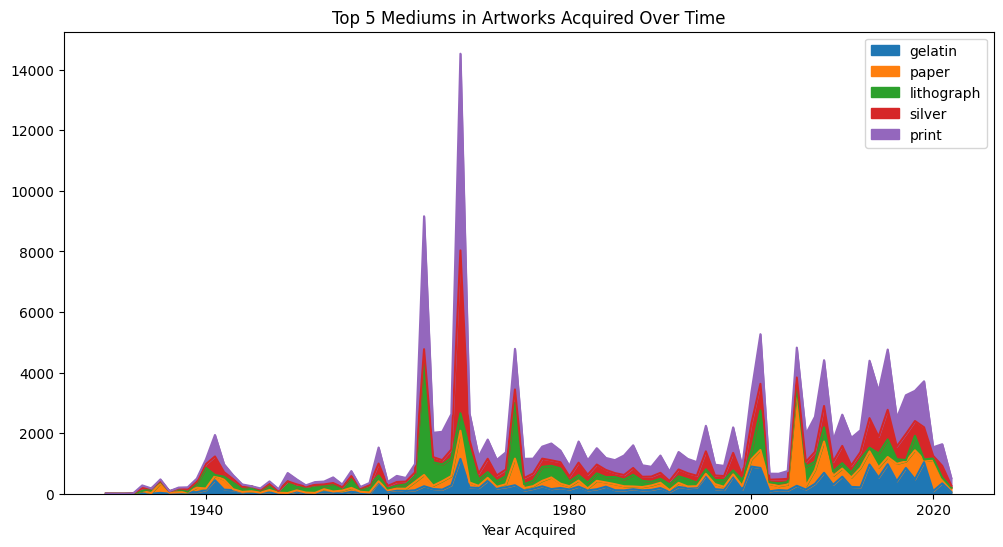

In [23]:
medyrplot = dfmedyear.groupby('YearAcquired').sum().plot(kind = 'area', figsize = (12,6))
medyrplot.set_xlabel('Year Acquired')
medyrplot.set_title('Top 5 Mediums in Artworks Acquired Over Time')

DATA VIZ 2:
Sentiment analysis on "Title" variable of artworks (using Vader). Plot negative and positive composite scores over time to identify if MoMA curators have fluctuated between positive and negative themes

In [24]:
dfartworks['Title'] = dfartworks['Title'].str.lower()
dfartworks = dfartworks.astype({'Title':'string'})

dftitle = dfartworks[['Title', 'Date']].dropna()
dftitle['Date'].dropna(inplace = True)
dftitle['Title'].dropna(inplace = True)
notyears = []
for w in dftitle['Date']:
    if (not pd.isna(w)) and not w.isnumeric() and len(w) != 4 and w not in notyears:
        notyears.append(w)
for i in notyears:
    dftitle = dftitle[dftitle['Date'] != i]
dftitle = dftitle[dftitle['Date'] != "n d "]
dftitle.sort_values('Date', inplace = True)
dftitle.reset_index(inplace = True, drop = True)

In [25]:
sia = vader.SentimentIntensityAnalyzer()
dftitle['Title'] = ' ' + dftitle['Title']
dfsentitime = pd.DataFrame(dftitle.groupby('Date')['Title'].sum())
dfsentitime
scorelist = []
for title in dfsentitime['Title']:
        sentiscore = 0
        for word in word_tokenize(title.lower()):
            if word not in myStopWords:
                sentiscore += sia.polarity_scores(word)['compound']
        scorelist.append(sentiscore)
dfsentitime['Sentiscore'] = scorelist
dfsentitime.reset_index(inplace = True)

In [26]:
dfsentitime = dfsentitime.astype({'Date':'int'})

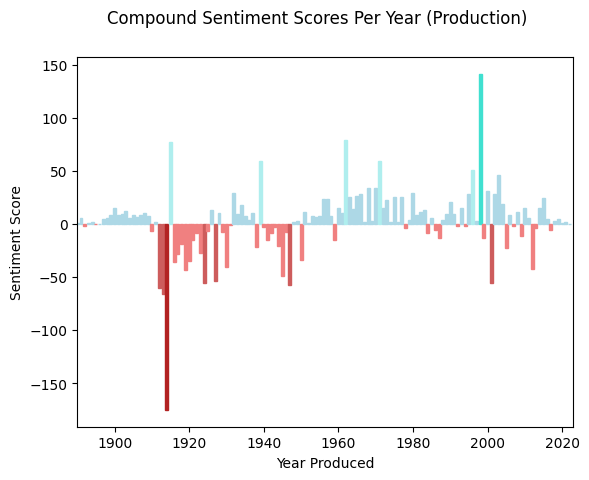

<Figure size 1200x600 with 0 Axes>

In [27]:
sentiplot = plt.bar(dfsentitime['Date'], dfsentitime['Sentiscore'])
for s in range(len(scorelist)):
    if scorelist[s] <= -150:
        sentiplot[s].set_color('firebrick')
    elif scorelist[s] > -150 and scorelist[s] <= -100:
        sentiplot[s].set_color('brown')
    elif scorelist[s] > -100 and scorelist[s] <= -50:
        sentiplot[s].set_color('indianred')
    elif scorelist[s] > -50 and scorelist[s] <= 0:
        sentiplot[s].set_color('lightcoral')
    elif scorelist[s] > 0 and scorelist[s] < 50:
        sentiplot[s].set_color('lightblue')
    elif scorelist[s] >= 50 and scorelist[s] < 100:
        sentiplot[s].set_color('paleturquoise')
    elif scorelist[s] >= 100 and scorelist[s] < 150:
        sentiplot[s].set_color('turquoise')
    elif scorelist[s] >= 150:
        sentiplot[s].set_color('darkturquoise')
plt.suptitle('Compound Sentiment Scores Per Year (Production)')
plt.ylabel('Sentiment Score')
plt.xlabel('Year Produced')
plt.xlim(1890, 2023)
plt.figure(figsize = (12,6))
plt.show()

In [28]:
dfsentaq = dfartworks[['Title', 'DateAcquired']].copy()
dfsentaq = dfsentaq.dropna()
dfsentaq['Date'] = pd.DatetimeIndex(dfsentaq['DateAcquired']).year
sia = vader.SentimentIntensityAnalyzer()
dfsentaq['Title'] = ' ' + dfsentaq['Title']
dfsentitime = pd.DataFrame(dfsentaq.groupby('Date')['Title'].sum())
dfsentitime
scorelist = []
for title in dfsentitime['Title']:
        sentiscore = 0
        for word in word_tokenize(title.lower()):
            if word not in myStopWords:
                sentiscore += sia.polarity_scores(word)['compound']
        scorelist.append(sentiscore)
dfsentitime['Sentiscore'] = scorelist
dfsentitime.reset_index(inplace = True)

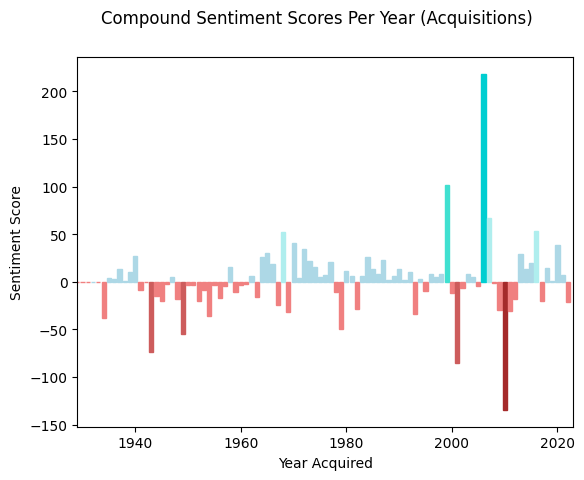

<Figure size 1200x600 with 0 Axes>

In [29]:
sentiplot = plt.bar(dfsentitime['Date'], dfsentitime['Sentiscore'])
for s in range(len(scorelist)):
    if scorelist[s] <= -150:
        sentiplot[s].set_color('firebrick')
    elif scorelist[s] > -150 and scorelist[s] <= -100:
        sentiplot[s].set_color('brown')
    elif scorelist[s] > -100 and scorelist[s] <= -50:
        sentiplot[s].set_color('indianred')
    elif scorelist[s] > -50 and scorelist[s] <= 0:
        sentiplot[s].set_color('lightcoral')
    elif scorelist[s] > 0 and scorelist[s] < 50:
        sentiplot[s].set_color('lightblue')
    elif scorelist[s] >= 50 and scorelist[s] < 100:
        sentiplot[s].set_color('paleturquoise')
    elif scorelist[s] >= 100 and scorelist[s] < 150:
        sentiplot[s].set_color('turquoise')
    elif scorelist[s] >= 150:
        sentiplot[s].set_color('darkturquoise')
plt.suptitle('Compound Sentiment Scores Per Year (Acquisitions)')
plt.ylabel('Sentiment Score')
plt.xlabel('Year Acquired')
plt.xlim(1929, 2023)
plt.figure(figsize = (12,6))
plt.show()

DATA VIZ 3:
Categorize nationalities into more broader regions (by continent/continental regions) and plot histograms/or a line plot for each region to identify groups that have come to be more represented/underrepresented

In [30]:
dfnat = pd.DataFrame(dfartists['Nationality'].dropna().value_counts())
dfnat.reset_index(inplace = True)

In [31]:
dfnat.rename(columns={'index':'nationality','Nationality':'frequency'}, inplace=True)

In [32]:
dfcountries = pd.read_csv('https://github.com/knowitall/chunkedextractor/raw/master/src/main/resources/edu/knowitall/chunkedextractor/demonyms.csv')
dfcountries.columns = ['nationality', 'country']
countrylist = []
for nat in dfnat['nationality'].values:
    foundnat = False
    for c in dfcountries['nationality'].values:
        if nat == 'American':
            countrylist.append('United States of America')
            foundnat = True
            break
        natlist = c.replace(" or ", ",")
        for w in natlist.split(','):
            if w.strip() == nat:
                countrylist.append(dfcountries.loc[dfcountries['nationality'] == c]['country'].values[0])
                foundnat = True
                break
        if foundnat:
            break
    if foundnat == False:
        if nat == 'Korean':
            countrylist.append('Korea')
        else:  
            countrylist.append('None')
dfnat['country'] = countrylist
dfnat = dfnat.astype({'nationality':'string'})
dfnat = dfnat.astype({'country':'string'})

In [33]:
dfnat['log(freq)'] = np.log(dfnat['frequency'])
m = folium.Map()
country_geo = f"https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json"
folium.Choropleth(
    geo_data=country_geo,
    data=dfnat,
    columns=["country", "log(freq)"],
    legend_name="Artists per Country (normalized with log)",
    key_on="feature.properties.name",
    nan_fill_opacity= 0,
    fill_color="YlGn",
    highlight = True
).add_to(m)

m

DATA VIZ 4: Plot frequencies of female/male artists over time (non-binary artists are excluded as there is less than 1% of them represented in this dataset)

In [34]:
dfgender_year = dfartists[['Gender', 'BeginDate', 'EndDate']].dropna()
dfgender_year = dfgender_year[dfgender_year['EndDate'] != 0]
dfgender_year = dfgender_year[dfgender_year['BeginDate'] != 0]
dfgender_year['Age'] = dfgender_year.apply(lambda row: row.EndDate - row.BeginDate, axis=1)

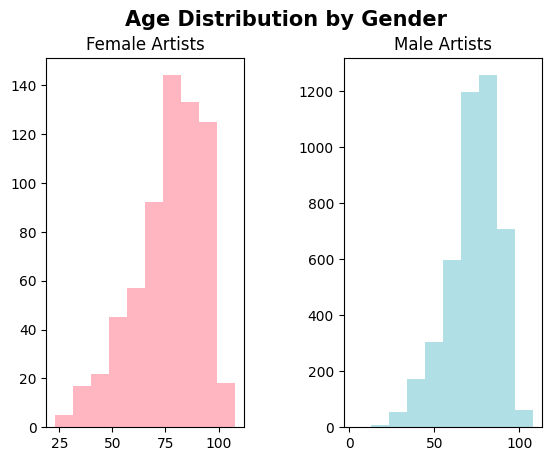

In [35]:
A = dfgender_year.loc[dfgender_year['Gender'] == 'male', 'Age']
B = dfgender_year.loc[dfgender_year['Gender'] == 'female', 'Age']
fig, axes = plt.subplots(ncols=2)
axes[1].hist(A, label='A', color ='powderblue')
axes[1].set(title='Male Artists')
axes[0].hist(B, label='B', color = 'lightpink')
axes[0].set(title='Female Artists')
fig.subplots_adjust(wspace= .5)
fig.suptitle('Age Distribution by Gender', fontweight='semibold', fontsize = 15)
plt.show()

In [36]:
#dfgw = dfworks[['Gender', 'Date']].dropna()
dfgw = dfartworks[['Gender', 'DateAcquired']].dropna()
dfgw['Date'] = pd.DatetimeIndex(dfgw['DateAcquired']).year

dfgw = dfgw.astype({'Gender':'string'})
dfgw = dfgw.astype({'Date':'int'})
for i in ['(', ')']: dfgw['Gender'] = dfgw['Gender'].str.replace(i, '')
dfgw['Gender'] = dfgw['Gender'].str.lower()

/tmp/ipykernel_541/3682067671.py:7: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [37]:
multartists = dfgw.copy()
multartists['Gender'] = multartists['Gender'].str.strip()
multartists = multartists[multartists['Gender'] != '']

In [38]:
multartists['male count'] = multartists['Gender'].str.count('male')
multartists['female count'] = multartists['Gender'].str.count('female')
f = pd.DataFrame(multartists.groupby('Date')['female count'].sum())
f.reset_index(inplace = True)
m = pd.DataFrame(multartists.groupby('Date')['male count'].sum())
m.reset_index(inplace = True)

In [39]:
multartists2 = multartists.copy()
multartists2 = multartists2[multartists2['Gender'] != 'male']
multartists2 = multartists2[multartists2['Gender'] != 'female']
multartists2['male count'] = multartists2['Gender'].str.count('male')
multartists2['female count'] = multartists2['Gender'].str.count('female')
f2 = pd.DataFrame(multartists2.groupby('Date')['female count'].sum())
f2.reset_index(inplace = True)
m2 = pd.DataFrame(multartists2.groupby('Date')['male count'].sum())
m2.reset_index(inplace = True)

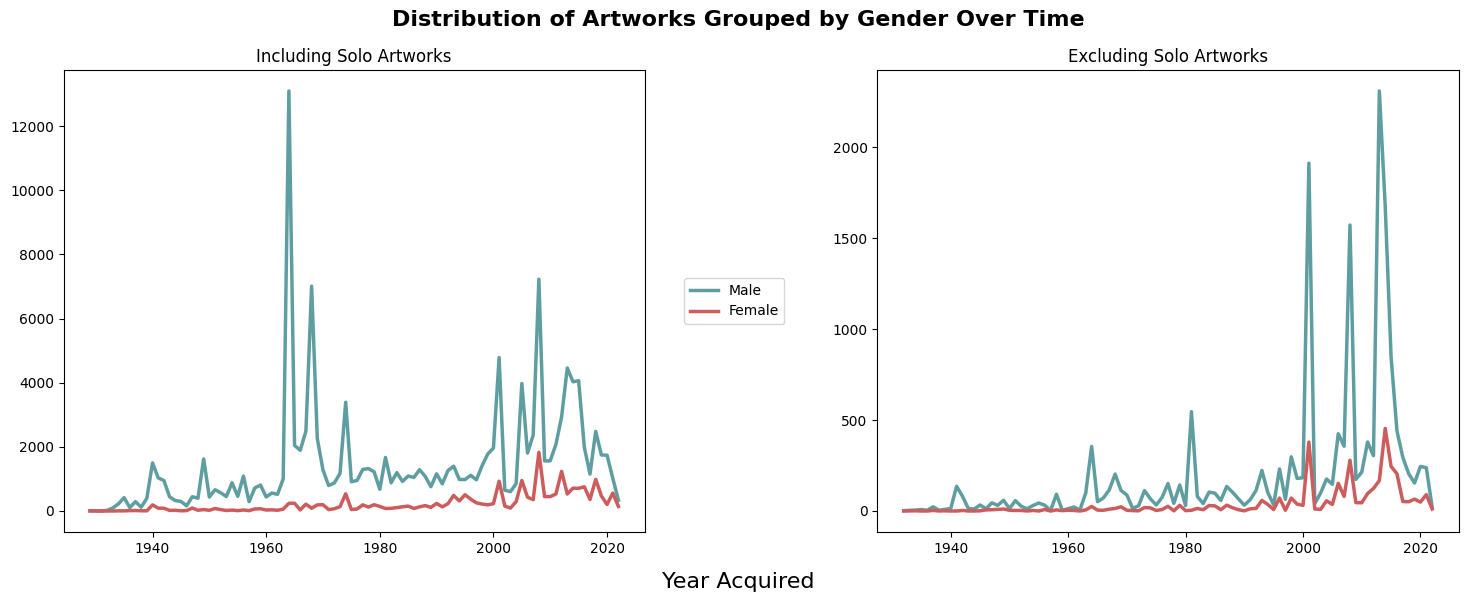

In [40]:
fig, ax = plt.subplots(ncols = 2, figsize =(18,6))
ax[0].plot(m['Date'], m['male count'], color = 'cadetblue', linewidth = 2.5)
ax[0].plot(f['Date'], f['female count'], color = 'indianred', linewidth = 2.5)
ax[1].plot(m2['Date'], m2['male count'], color = 'cadetblue', linewidth = 2.5)
ax[1].plot(f2['Date'], f2['female count'], color = 'indianred', linewidth = 2.5)
ax[0].set(title = 'Including Solo Artworks')
ax[1].set(title = 'Excluding Solo Artworks')
fig.subplots_adjust(wspace= .4)
fig.suptitle('Distribution of Artworks Grouped by Gender Over Time', fontweight='semibold', fontsize = 16)
fig.supxlabel('Year Acquired', fontsize = 16)
plt.figlegend(['Male', 'Female'], loc = 'center')

In [41]:
dfgw = dfworks[['Gender', 'Date']].dropna()
dfgw = dfgw.astype({'Gender':'string'})
dfgw = dfgw.astype({'Date':'int'})
for i in ['(', ')']: dfgw['Gender'] = dfgw['Gender'].str.replace(i, '')
dfgw['Gender'] = dfgw['Gender'].str.lower()
multartists = dfgw.copy()
multartists['Gender'] = multartists['Gender'].str.strip()
multartists = multartists[multartists['Gender'] != '']
multartists['male count'] = multartists['Gender'].str.count('male')
multartists['female count'] = multartists['Gender'].str.count('female')
f = pd.DataFrame(multartists.groupby('Date')['female count'].sum())
f.reset_index(inplace = True)
m = pd.DataFrame(multartists.groupby('Date')['male count'].sum())
m.reset_index(inplace = True)
multartists2 = multartists.copy()
multartists2 = multartists2[multartists2['Gender'] != 'male']
multartists2 = multartists2[multartists2['Gender'] != 'female']
multartists2['male count'] = multartists2['Gender'].str.count('male')
multartists2['female count'] = multartists2['Gender'].str.count('female')
f2 = pd.DataFrame(multartists2.groupby('Date')['female count'].sum())
f2.reset_index(inplace = True)
m2 = pd.DataFrame(multartists2.groupby('Date')['male count'].sum())
m2.reset_index(inplace = True)

/tmp/ipykernel_541/1827326518.py:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



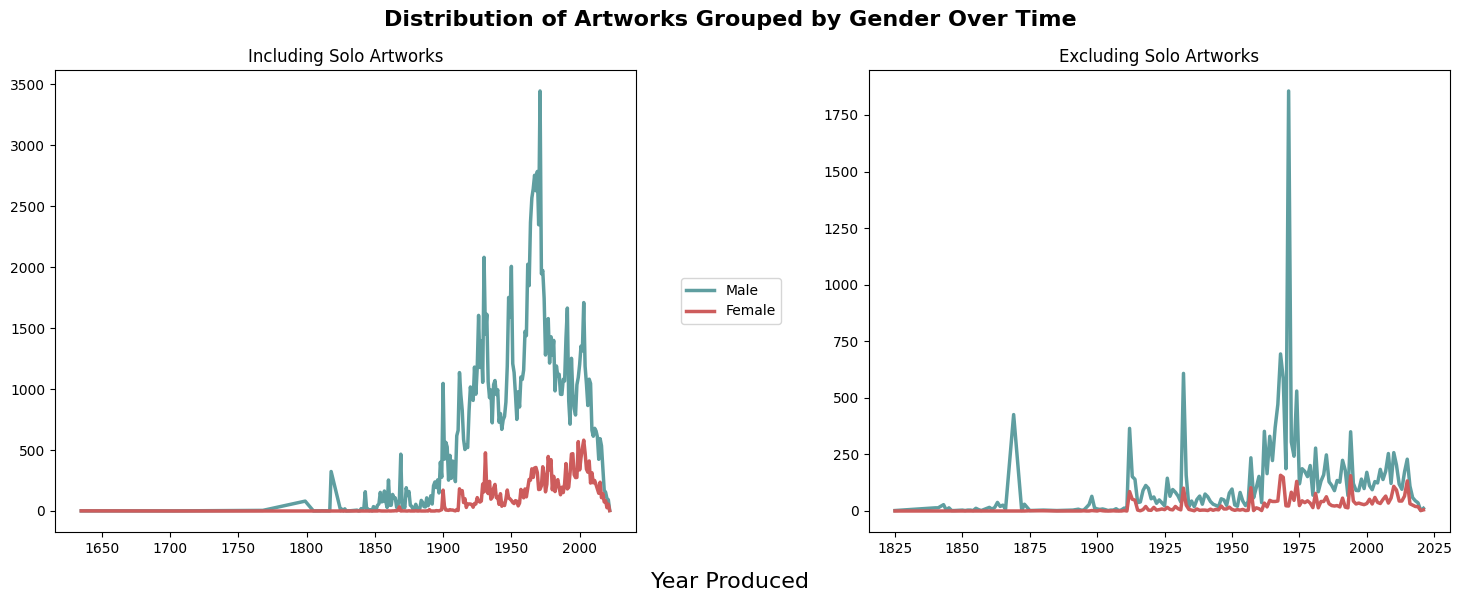

In [42]:
fig, ax = plt.subplots(ncols = 2, figsize =(18,6))
ax[0].plot(m['Date'], m['male count'], color = 'cadetblue', linewidth = 2.5)
ax[0].plot(f['Date'], f['female count'], color = 'indianred', linewidth = 2.5)
ax[1].plot(m2['Date'], m2['male count'], color = 'cadetblue', linewidth = 2.5)
ax[1].plot(f2['Date'], f2['female count'], color = 'indianred', linewidth = 2.5)
ax[0].set(title = 'Including Solo Artworks')
ax[1].set(title = 'Excluding Solo Artworks')
fig.subplots_adjust(wspace= .4)
fig.suptitle('Distribution of Artworks Grouped by Gender Over Time', fontweight='semibold', fontsize = 16)
fig.supxlabel('Year Produced', fontsize = 16)
plt.figlegend(['Male', 'Female'], loc = 'center')

## Discussion